In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import importlib

In [2]:
import io_utils
import utils
import geometry

In [3]:
importlib.reload(io_utils)
importlib.reload(utils)
importlib.reload(geometry)
geom=geometry.MinkowskiSpherical()

In [15]:
superphoton_data = io_utils.read_superphoton_data("tests/stream_superphoton_data.txt")

geom = geometry.MinkowskiSpherical()

nrecords = 3

start_x = [0,-20,0,0]

n_superphotons = len(superphoton_data)//nrecords
split_data = np.array(np.split(np.array(superphoton_data),nrecords,axis=0))
x_array_spherical = split_data[:,:,0,:].transpose(1,0,2)
k_array_spherical = split_data[:,:,1,:].transpose(1,0,2)
x_array=np.apply_along_axis(geom.spher_to_cart,-1,x_array_spherical)
x_array_shifted = x_array.copy()
# x_array_shifted[:,:,1]-=20
x_array_spherical_shifted = np.apply_along_axis(geom.cart_to_spher,-1,(x_array_shifted))
eps_array = split_data[:,:,1,0].transpose(1,0)


In [16]:
np.array(superphoton_data).shape

(300000, 2, 4)

In [17]:
eps_array.shape

(100000, 3)

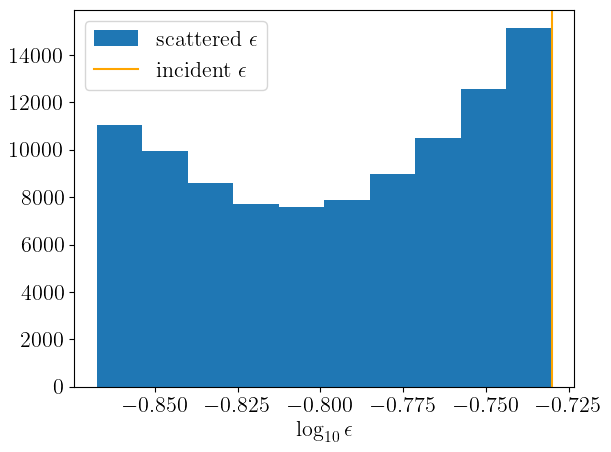

In [18]:
plt.clf()
plt.hist(np.log10(eps_array[:,-1]),label=r"scattered $\epsilon$")
plt.axvline(np.log10(eps_array[0,0]),color='orange',label=r"incident $\epsilon$")
plt.xlabel(r"$\log_{10} \epsilon $")
plt.legend()
plt.tight_layout()
# plt.savefig("tests/plots/stream_photon_scatter_distribution.png",dpi=100)
plt.show()

Text(0.5, 0, 'Z')

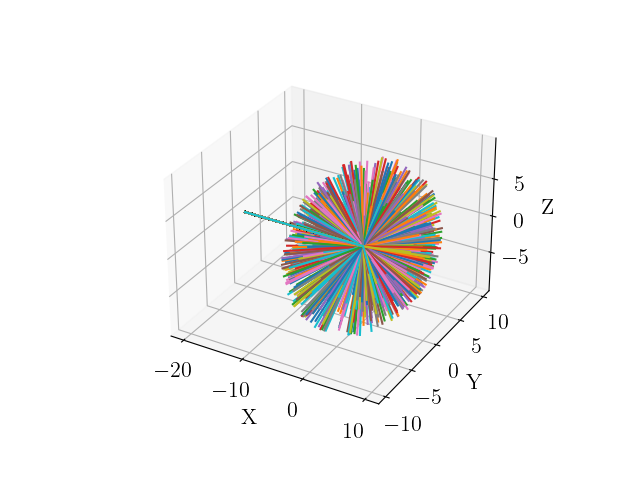

In [267]:
%matplotlib widget
# %matplotlib inline
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
# ax = fig.add_subplot(111)

for ii in range(n_superphotons)[::100]:
    ax.plot(x_array[ii,:,1],x_array[ii,:,2],x_array[ii,:,3])
# for ii in np.arange(min(int(n_superphotons),1000)):
#     ax.plot(x_array[:,ii,1],x_array[:,ii,2],x_array[:,ii,3])
    # ax.plot(x_array[:,ii,1],x_array[:,ii,2])

# Add labels
# ax.set_ylim([-10,10])
# ax.set_zlim([-10,10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# plt.savefig(f"tests/plots/stream_geodesics_scatter.png",dpi=100)
# ax.plot(

In [265]:
plt.clf()
xvals = np.linspace(0,np.pi,1000)
plt.plot(xvals,thomson_differential(np.pi/2 - xvals))

In [324]:
scattering_angles = np.arctan2(np.sqrt(x_array_shifted[:,-1,2]**2 + x_array_shifted[:,-1,3]**2),x_array_shifted[:,-1,1])
scattering_angles_phi = np.arctan2(x_array_shifted[:,-1,2],x_array_shifted[:,-1,3])

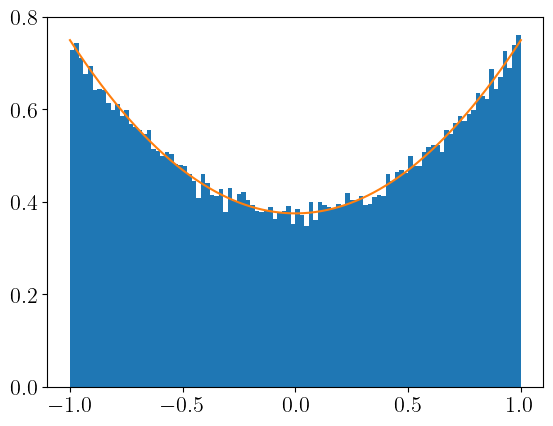

In [389]:
plt.clf()
# plt.hist(k_array_spherical[:,2,2]/k_array_spherical[:,2,0])
plt.hist(np.cos(scattering_angles),bins=100,density=True)
xvals = np.linspace(-1,1,1000)
plt.plot(xvals,thomson_differential(xvals,arg='cos'))

# plt.hist(x_array_spherical_shifted[:,2,3],density=True)
plt.show()

In [304]:
def thomson_differential(theta,arg='ang'):
    if(arg=='ang'):
        return 3/8 * (1 + np.cos(theta)**2)
    else:
        return  3/8 * (1 + theta**2)

In [189]:
from utils import constants
def bnu(nu,temp=1):
    """Planck function"""
    return 2 * constants["h"] * nu**3 /(constants['c']**2) * 1/(np.exp(constants['h']*nu / (temp * constants['me'] * constants['c']**2))-1)


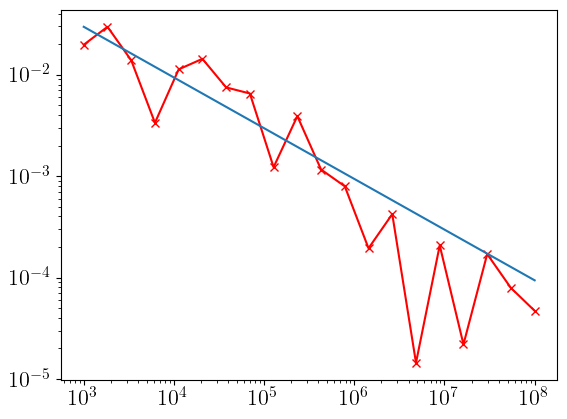

In [388]:
# test central limit theorem when sampling a symmetric distribution
%matplotlib inline
import random
nsamps = np.logspace(3,8,20)
# nsamps=range(200)
errors=[]
for nsamp in map(int,nsamps):
    test = []
    for i in range(int(1)):
        samples = np.random.normal(loc=1,size=nsamp)
        test.append(np.sum(samples)/nsamp)
    errors.append(abs(1 - np.mean(test))
plt.loglog(nsamps,errors,'rx-')
plt.loglog(nsamps,np.max(errors)*nsamps[0]**0.5*nsamps**-0.5)
# xvals = np.linspace(-5,5,1000)
# yvals = list(map(lambda x: 1/np.sqrt(2*np.pi) * np.exp(-x**2/2),xvals))
# plt.plot(xvals,yvals)
# _=plt.hist(samples,bins=100,density=True)